In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler


In [2]:
dados = pd.read_pickle('Dados')

In [3]:
features = list(dados.columns)
features.remove("structure")
features.remove("is_metal")
features.remove("composition")
features.remove("formula")
X = dados[features]
colunas = X.columns
X_formula = X.copy()

X_formula["formula"] = dados["formula"]

seed = 21

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns =colunas)

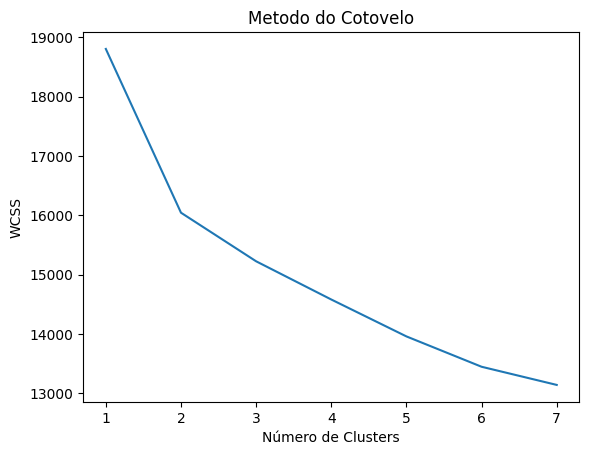

In [5]:
# use elbow mwthod to find optimal number of clusters

# with in cluster sum of squares
wcss = []
for i in range(1, 8):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=seed
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss)
plt.title("Metodo do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.savefig("cotovelo.png")
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

 

sil = []
kmax = 8

 

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k,init="k-means++", max_iter=300, n_init=10, random_state=seed).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

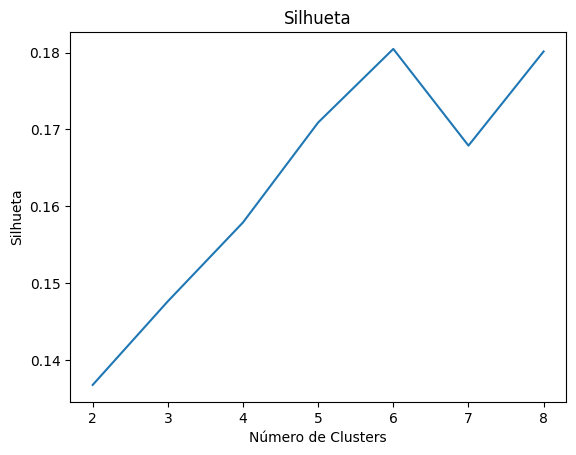

In [13]:
plt.plot(range(2, 9), sil)
plt.title("Silhueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhueta")
plt.savefig("silhueta.png")
plt.show()

In [8]:
kmeans = KMeans(n_clusters=6, init="k-means++", max_iter=1000, n_init=10, random_state=seed) 
y_pred = kmeans.fit_predict(X)

In [12]:
data = [go.Scatter3d(
    x=X_formula[y_pred == i]["melting_point"],
    y=X_formula[y_pred == i]["thermal_conductivity"],
    z=X_formula[y_pred == i]["band center"],
    mode="markers",
    text=X_formula[y_pred == i]["formula"],
    marker=dict(
        size=2,
        symbol="circle",
        line=dict(color="rgba(0, 0, 0)", width=0.5),
    ),
)for i in range(y_pred.max()+1)]
# centroids X, Y Coordinates can be obtained through kmeans.cluster_centers_
centros = scaler.inverse_transform(kmeans.cluster_centers_)
scatter5 = go.Scatter3d(
    x=centros[:, 0],
    y=centros[:, 1],
    z=centros[:, -4],
    mode="markers",
    marker=dict(color="black", symbol="cross"),
)

# Criação da lista de dados
data  = data+ [scatter5]

layout = go.Layout(
    scene=dict(xaxis_title="Ponto de fusão (ºC)", yaxis_title="Condutividade térmica (W/m·K)", zaxis_title="band center"),
    margin=dict(l=20, r=20, b=20, t=20),
    width=800,
    height=600,
)

# Criação da figura
fig = go.Figure(data=data, layout=layout)

fig.write_html('scatter3d.html')

# Exibição do gráfico
fig.show()

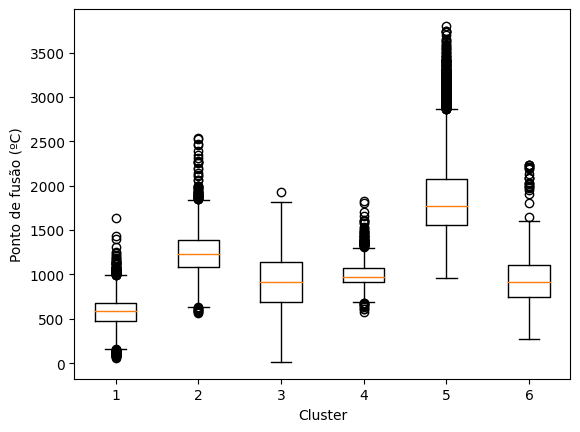

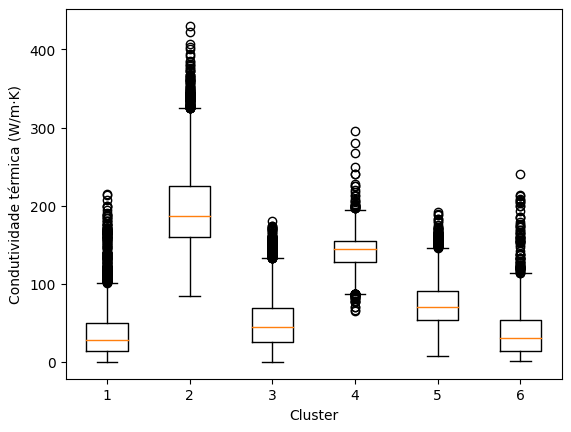

In [10]:
plt.boxplot([X_formula[y_pred == i]["melting_point"] for i in range(y_pred.max() + 1)])
plt.xlabel("Cluster")
plt.ylabel("Ponto de fusão (ºC)")
plt.savefig("dist_fusao.png")
plt.show()

plt.boxplot(
    [X_formula[y_pred == i]["thermal_conductivity"] for i in range(y_pred.max() + 1)]
)
plt.xlabel("Cluster")
plt.ylabel("Condutividade térmica (W/m·K)")
plt.savefig("dist_thermal_conductivity.png")
plt.show()